# Prédiction du prix des voitures à travers une application Web

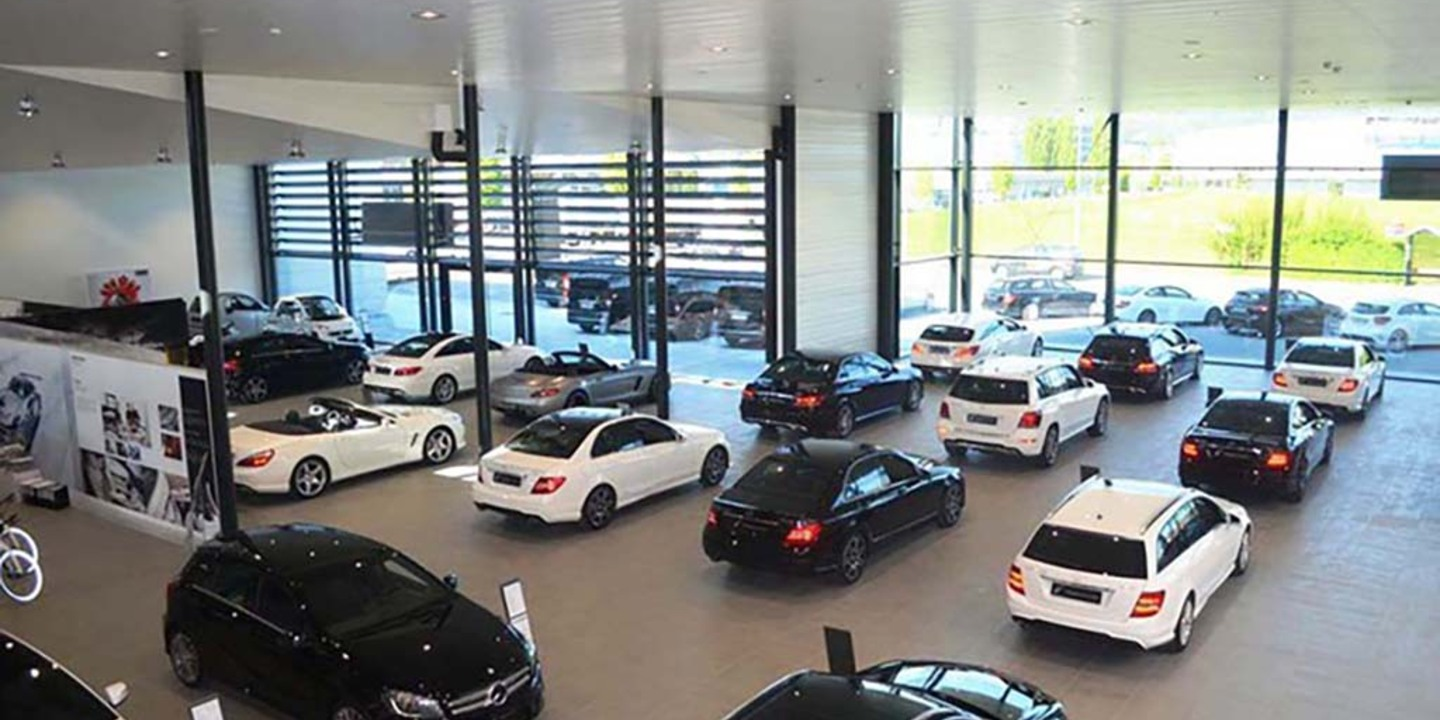

À partir des données concernant les voitures, faisons un modèle de Machine Learning permettant de prédire le prix des voitures et déployons ce modèle.

### Contexte du projet

En tant que développeur Data, Data Scientiste, -Analyste et Visualisation des données -Normalisation des données -Créer le modèle d'Apprentissage Automatique permettant de prédire les prix des voitures et le deployer comme application Web

### Modalités pédagogiques

Le travail se fera ainsi:

-Equipe de 5 personnes

-Methodologie Agile

-Git et Github
#### Livrables

Un dépôt Git contenant (lien Github):
-Le notebook
-Le poster (fichier pdf)
-lien de votre Application Web (streamlit)

### 1. Librairies à importer

In [81]:
# # Importation des librairies et les fonctions utils pour l'analyse, la manipulation et la visualisation de Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

### 2. Importer les données

In [82]:
data = pd.read_csv('car_price_prediction.csv')

In [83]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### 3. Analyse exploratoire des données

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [85]:
# On utilise la méthode describe() pour obtenir un résumé rapide de notre DataFrame (moyenne, écart type, minimum, maximum et d’autres informations pour chacune des colonnes du DataFrame)
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [86]:
sns.pairplot(data)

In [87]:
data.hist(figsize=(15,15));

In [88]:
#Visualisation de la matrice de correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,1:5].corr(), annot=True, fmt="0%");

### 4. Prétraitement des données

In [89]:
# Vérifier les valeurs manquantes
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [90]:
# Supprimer les colonnes inutiles
data.drop(['ID'], axis=1, inplace=True)

In [91]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [92]:
# On remplacement des valeurs manquantes
data['Levy'].replace({'-':np.nan}, inplace = True)

data['Levy'] = data['Levy'].astype('float64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [93]:
data.drop_duplicates(inplace=True)

In [94]:
# Vérification des données manquantes
data.isnull().sum()

Price                  0
Levy                5684
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

Nous rémarquons qu'il n'y'a 5684 valeurs manquantes

In [95]:
# Suppression des valeurs aberrantes
data.dropna(inplace=True, axis=0)

data.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [96]:
print()
print('Les types de carburants sont :\n',data['Fuel type'].value_counts())
print()


Les types de carburants sont :
 Petrol            5503
Diesel            2376
Hybrid            1636
LPG                467
Plug-in Hybrid      41
CNG                 18
Name: Fuel type, dtype: int64



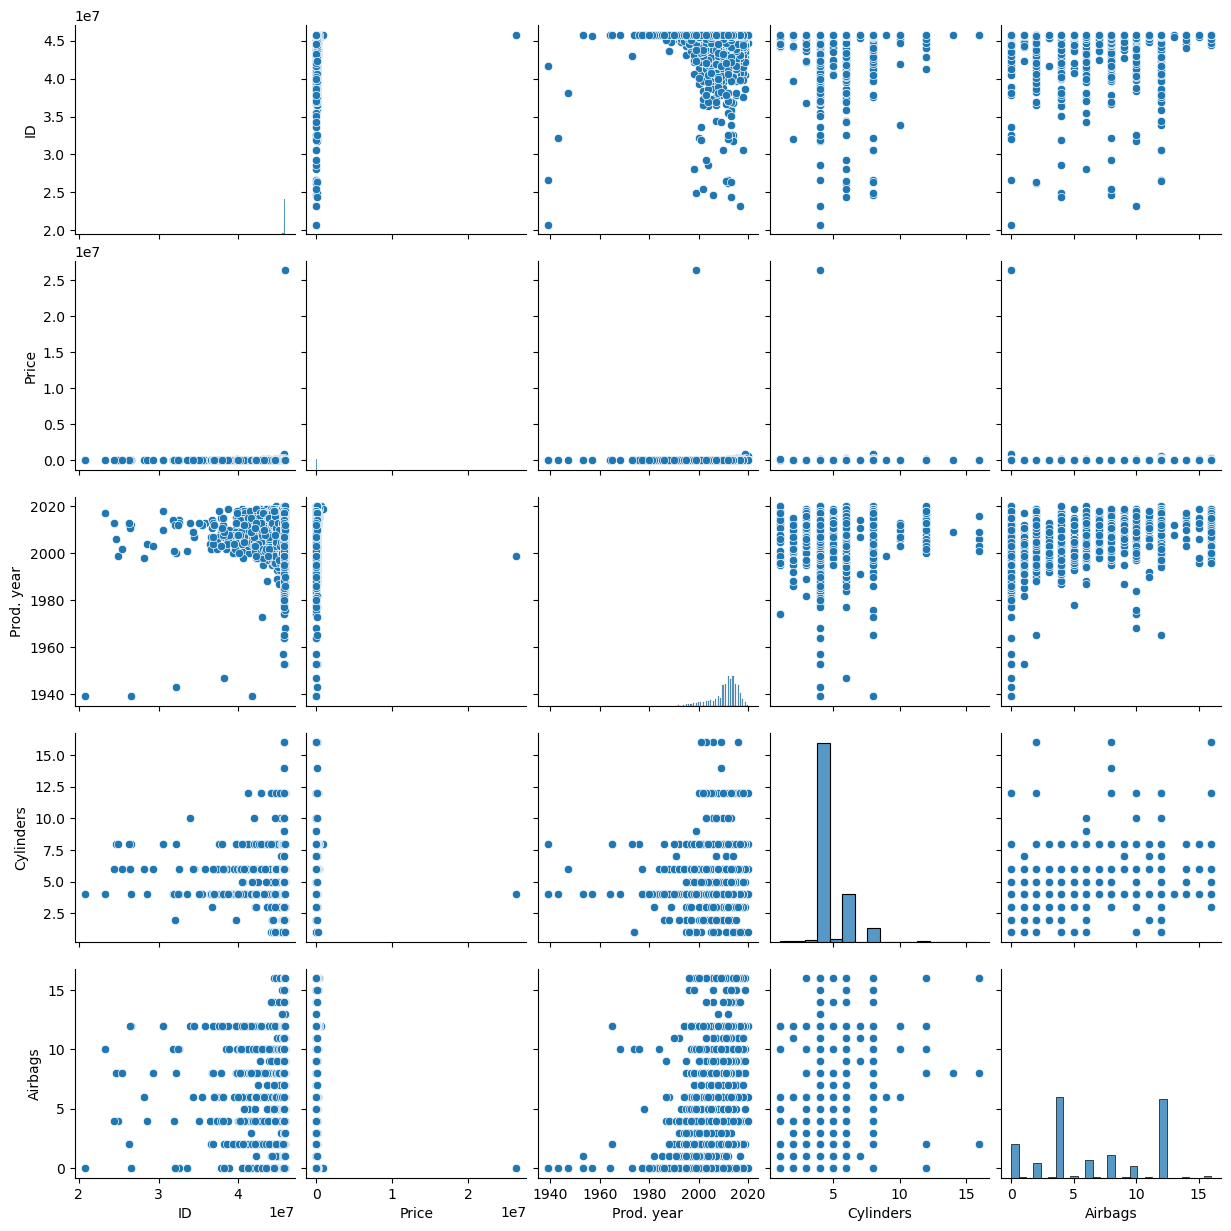

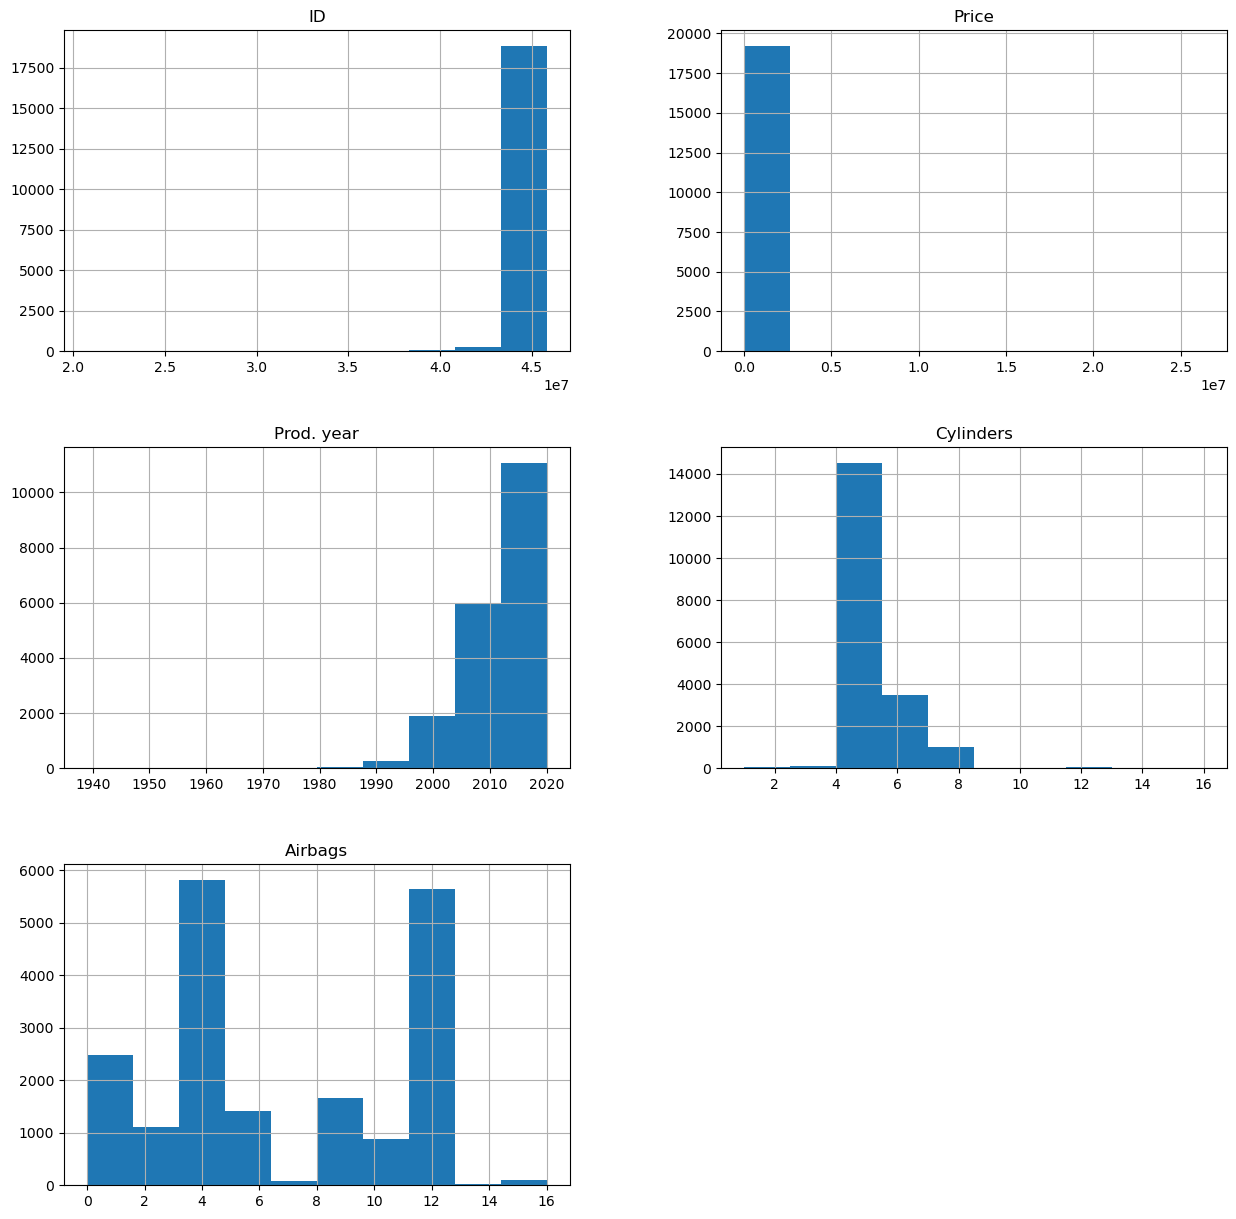

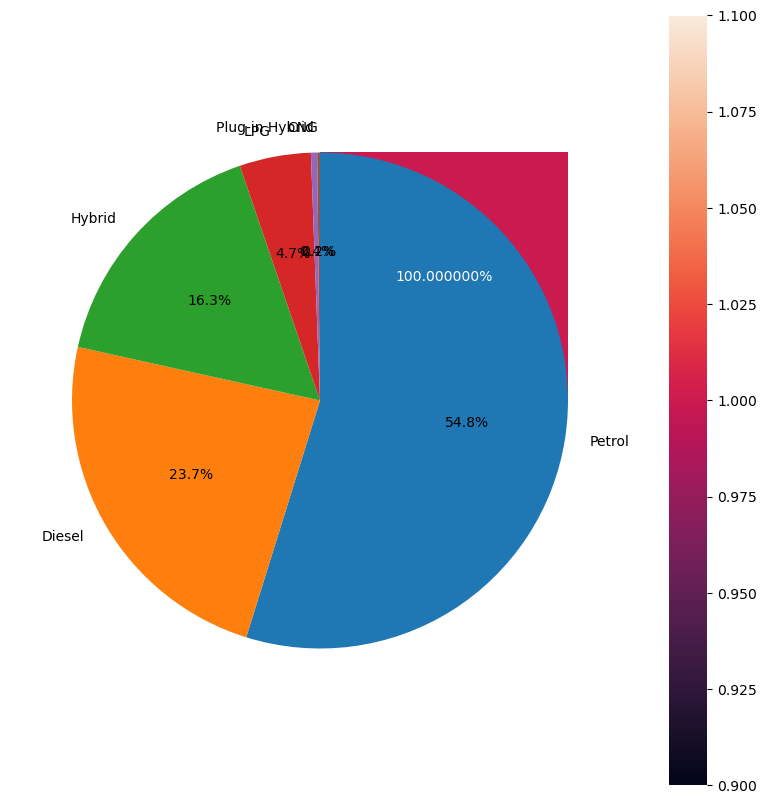

In [97]:
# code pour le camembert
sorted_counts = data['Fuel type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%', counterclock = False);
plt.show();

In [98]:
print('Les types de boîte de vitesses sont :\n', data['Gear box type'].value_counts())

Les types de boîte de vitesses sont :
 Automatic    8054
Tiptronic    1372
Manual        325
Variator      290
Name: Gear box type, dtype: int64


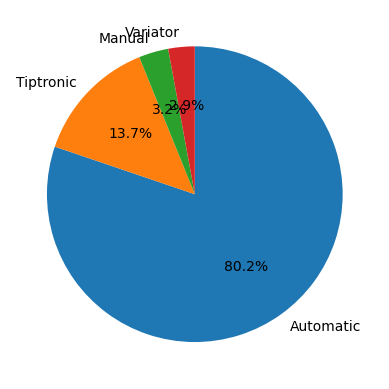

In [99]:
# code pour le camembert
sorted_counts = data['Gear box type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%', counterclock = False);
plt.show();

In [100]:
print('Les fabricants sont : \n', data['Manufacturer'].value_counts())

Les fabricants sont : 
 HYUNDAI          2825
TOYOTA           1820
CHEVROLET         911
FORD              587
MERCEDES-BENZ     521
HONDA             489
SSANGYONG         414
BMW               363
LEXUS             335
KIA               329
VOLKSWAGEN        273
NISSAN            250
SUBARU            115
AUDI              109
JEEP               94
OPEL               77
MAZDA              69
MITSUBISHI         64
DAEWOO             60
DODGE              57
FIAT               46
JAGUAR             29
MINI               25
PORSCHE            24
SUZUKI             17
LAND ROVER         16
CHRYSLER           16
BUICK              15
ACURA              14
GMC                12
RENAULT            11
CADILLAC           10
INFINITI            7
LINCOLN             5
VOLVO               5
CITROEN             5
MERCURY             3
MASERATI            3
DAIHATSU            2
FERRARI             2
SCION               2
PEUGEOT             2
VAZ                 2
SKODA               1
LAMBORGH

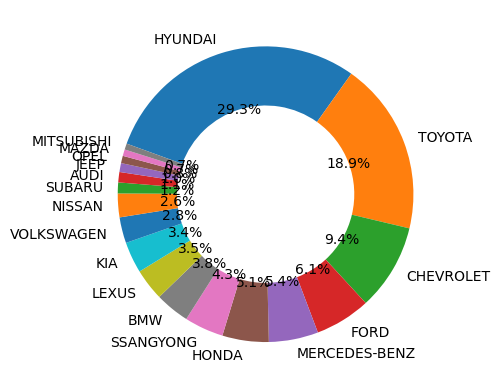

In [101]:
sorted_counts = data['Manufacturer'].value_counts().head(18)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 160, autopct='%1.1f%%', 
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.show();

In [102]:
print('Les Catégories sont :\n', data['Category'].value_counts())

Les Catégories sont :
 Sedan          4704
Jeep           3077
Hatchback      1417
Minivan         258
Coupe           223
Universal       181
Goods wagon      74
Microbus         70
Pickup           21
Cabriolet        16
Name: Category, dtype: int64


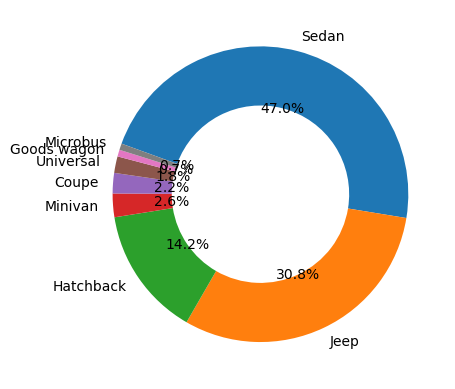

In [103]:
sorted_counts = data['Category'].value_counts().head(8)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 160, autopct='%1.1f%%',
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.show();

In [104]:
# Calcul de la corrélation des variables
data.corr()

,Price,Levy,Prod. year,Cylinders,Airbags
Price,1.000000,0.081075,0.300160,0.068014,-0.164185
Levy,0.081075,1.000000,-0.226092,0.496426,0.083863
Prod. year,0.300160,-0.226092,1.000000,-0.098084,0.087603
Cylinders,0.068014,0.496426,-0.098084,1.000000,0.249078
Airbags,-0.164185,0.083863,0.087603,0.249078,1.000000


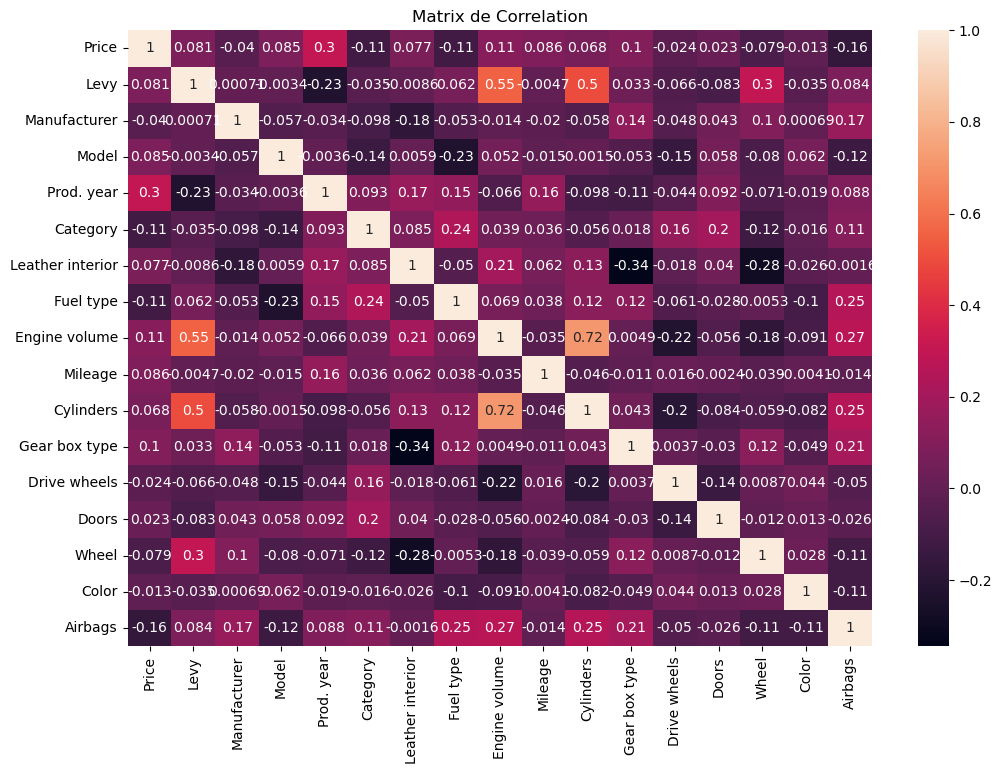

In [116]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, cbar = True)
plt.title('Matrix de Correlation')
plt.show()

In [117]:
# Supprimer les colonnes inutiles
data.drop(['Levy'], axis=1, inplace=True)

In [118]:

# Transformer les variables catégorielles en numériques
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Fuel type'] = labelencoder.fit_transform(data['Fuel type'])
data['Category'] = labelencoder.fit_transform(data['Category'])
data['Drive wheels'] = labelencoder.fit_transform(data['Drive wheels'])
data['Engine volume'] = labelencoder.fit_transform(data['Engine volume'])
data['Model'] = labelencoder.fit_transform(data['Model'])
data['Manufacturer'] = labelencoder.fit_transform(data['Manufacturer'])
data['Leather interior'] = labelencoder.fit_transform(data['Leather interior'])
data['Mileage'] = labelencoder.fit_transform(data['Mileage'])
data['Gear box type'] = labelencoder.fit_transform(data['Gear box type'])
data['Doors'] = labelencoder.fit_transform(data['Doors'])
data['Wheel'] = labelencoder.fit_transform(data['Wheel'])
data['Color'] = labelencoder.fit_transform(data['Color'])

In [119]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,26,629,2010,4,1,2,52,2506,6.0,0,0,1,0,12,12
1,16621,6,313,2011,4,0,4,47,2608,6.0,2,0,1,0,1,8
3,3607,14,316,2011,4,1,2,37,2150,4.0,0,0,1,0,14,0
4,11726,17,331,2014,3,1,4,13,6471,4.0,0,1,1,0,12,4
5,39493,19,652,2016,4,1,1,27,1966,4.0,0,1,1,0,14,4


### 5. Diviser les données en ensemble de formation et ensemble de test

In [120]:
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y

0        13328
1        16621
3         3607
4        11726
5        39493
         ...  
19225     8781
19230      470
19233    15681
19234    26108
19236      470
Name: Price, Length: 10041, dtype: int64

In [121]:
X.head()

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,26,629,2010,4,1,2,52,2506,6.0,0,0,1,0,12,12
1,6,313,2011,4,0,4,47,2608,6.0,2,0,1,0,1,8
3,14,316,2011,4,1,2,37,2150,4.0,0,0,1,0,14,0
4,17,331,2014,3,1,4,13,6471,4.0,0,1,1,0,12,4
5,19,652,2016,4,1,1,27,1966,4.0,0,1,1,0,14,4


### 6. Entraîner le modèle

In [122]:
# Créer un objet de régression linéaire
linear_regression_model = LinearRegression()

# Former le modèle sur les données d'entraînement
linear_regression_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = linear_regression_model.predict(X_test)

### 7. Evaluation du modèle

In [123]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

257808330.01932642
16056.41086978427


### 8. Enregistrement du modèle

In [124]:
model_pickle = open('model.pkl', 'wb')
pickle.dump(linear_regression_model, model_pickle)
model_pickle.close()

### 9. Déploiement du modèle

In [127]:
# Charger le modèle à partir du fichier pkl
model_pickle = open('model.pkl', 'rb')
linear_regression_model = pickle.load(model_pickle)

# Définir la fonction de prédiction du modèle
def predict_car_price(inputs):
    inputs = np.array(inputs).reshape(1,-1)
    Price = linear_regression_model.predict(inputs)
    return Price

# Tester la fonction de prédiction
inputs = [26,629,2010,4,1,2,52,2506,6.0,0,0,1,0,12,12]
          

In [128]:
print(predict_car_price(inputs))

[13085.72341997]


/home/bemadji/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
